<a href="https://colab.research.google.com/github/Zahra-ziaee/Pipelines-for-Preprocessing/blob/main/Pipelines_for_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'titanic:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F3136%2F26502%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240526%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240526T065631Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D6452899c1dd1c20127843efbb1a18c8608df8f2eacc319367e6d1cfd85c2e844052f6bd0cccbdcb5ff68285fb89dcd51681b5e0a251935f1c59b1055a4eaeb23697bff3f3216e814a7ddf8c6b3dfa210ebcb02209df08ae5a27b551ca5f919134d0f8255721d59792d3e4db2cf63f18403a46770b3d5bd114b7bc6ec11c0313ed795be4a4c4ee691239ed0e5bc05dd7bdb01f9d226980e74bc63231e67d1a4b581976a97fe7286be78f9346dfb0abc3abb76c9f50559ad16643721956e772c75a38b4bef74dbdfd39aacc35bf9ebf8027810f7c9b4ecbf29cfa020bff3b61b372da39a5c7c4158522a20f98cb8d21c0c76185056e61207c1fdf0e92bb51ec419'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 34877 bytes downloaded
Downloaded and uncompressed: titanic
Data source import complete.


In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sample = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
train = pd.read_csv('/kaggle/input/titanic/train.csv', index_col = 'PassengerId')
trainX = train.drop(['Survived'], axis=1)
trainy = train['Survived']
test = pd.read_csv('/kaggle/input/titanic/test.csv', index_col = 'PassengerId')

In [11]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
print('Number of missing values per column')
pd.concat([trainX.isna().sum(0),test.isna().sum(0)], axis=1).rename({0: 'train', 1:'test'}, axis=1)

Number of missing values per column


,train,test
Pclass,0,0
Name,0,0
Sex,0,0
Age,177,86
SibSp,0,0
Parch,0,0
Ticket,0,0
Fare,0,1
Cabin,687,327
Embarked,2,0


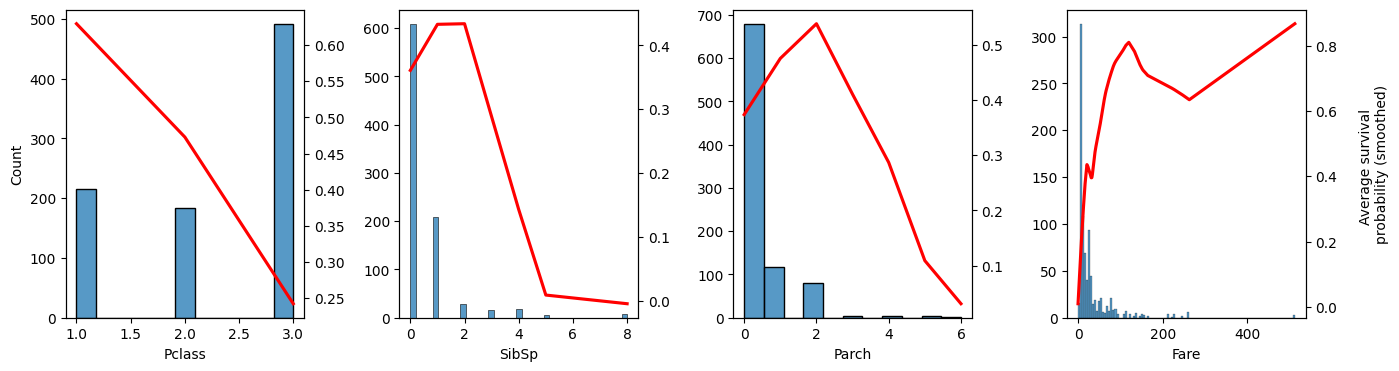

In [13]:

plt.figure(figsize=(16,4))
plt.subplots_adjust(wspace=0.4)
for i,x in enumerate(['Pclass','SibSp', 'Parch', 'Fare']):
    plt.subplot(1,4,i+1)
    sns.histplot(train[x])
    group_mean = train.groupby(train[x])['Survived'].mean()
    ax = plt.gca()
    ax2=ax.twinx()
    sns.regplot(x=group_mean.index, y=list(group_mean),lowess=True,scatter=False, color='red')
    if i == 0:
        ax.set_ylabel('Count')
    else:
        ax.set_ylabel('')
    if i == 3:
        ax2.set_ylabel('\nAverage survival \nprobability (smoothed)')


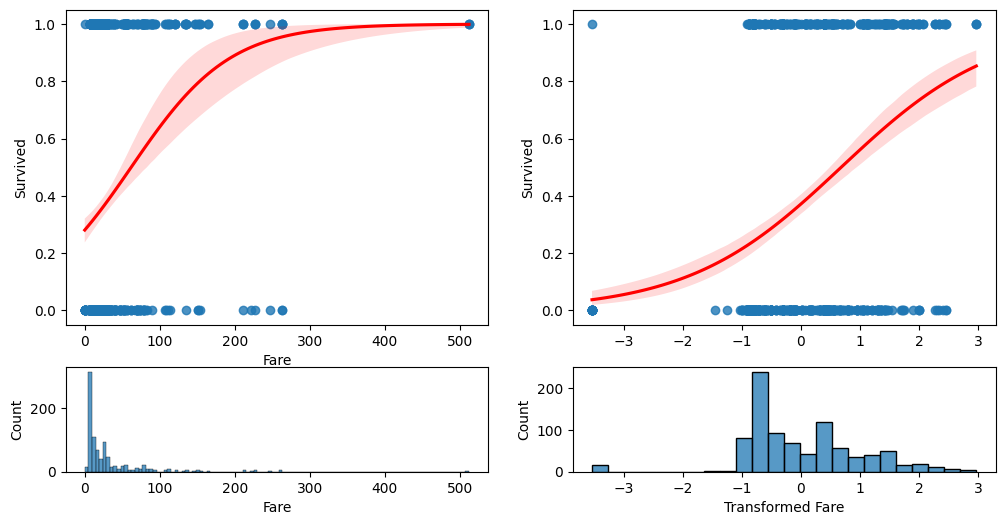

In [14]:
from sklearn.preprocessing import PowerTransformer

f, axes = plt.subplots(2, 2, gridspec_kw={'height_ratios': [3,1]},
                      figsize=(12,6))
_=sns.regplot(x=train['Fare'], y=trainy, logistic=True, line_kws={'color': 'red'},
           ax=axes[0,0])
_=sns.regplot(x=PowerTransformer().fit_transform(train[['Fare']]), y=trainy, logistic=True,
           line_kws={'color': 'red'},
        ax=axes[0,1])
_=plt.gca().set_xlabel('Transformed Fare')
_=sns.histplot(x=train['Fare'],
            ax = axes[1,0])
_=plt.gca().set_xlabel('Fare')
_=sns.histplot(x=PowerTransformer().fit_transform(train[['Fare']]).ravel(),
            ax = axes[1,1])
_=plt.gca().set_xlabel('Transformed Fare')


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, StratifiedKFold, KFold

cv_mean_acc = cross_validate(estimator=LogisticRegression(),
               scoring = 'accuracy',
               cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123),
               X = train[['Pclass','SibSp', 'Parch', 'Fare']], y=trainy)['test_score'].mean()
print(f"Average cross-validated accuracy from logistic regression on raw data: {cv_mean_acc:.3f}")

Average cross-validated accuracy from logistic regression on raw data: 0.686


In [16]:
from sklearn.pipeline import Pipeline

simplest_pipeline = Pipeline(steps = [('normalize', PowerTransformer()),
                                      ('lr_model', LogisticRegression())])

In [17]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=124)
cv_mean_acc_pipeline = cross_validate(estimator=simplest_pipeline,
               scoring = 'accuracy',
               cv = skf,
               X = train[['Pclass','SibSp', 'Parch', 'Fare']], y=trainy)['test_score'].mean()
print(f"Average cross-validated accuracy from logistic regression with transformed data: {cv_mean_acc_pipeline:.3f}")

Average cross-validated accuracy from logistic regression with transformed data: 0.708


In [18]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion

In [19]:
class SimpleImputerNamed(SimpleImputer):
    from sklearn.impute import SimpleImputer
    def get_feature_names_out(self):
        return list(self.feature_names_in_)
class OrdinalEncoderNamed(OrdinalEncoder):
    def get_feature_names_out(self):
        return list(self.feature_names_in_)
class OneHotEncoderNamed(OneHotEncoder):
    def get_feature_names_out(self):
        names_out = []
        for i, name_in in enumerate(self.feature_names_in_):
            names_out += [f'{name_in}_{j}' for j in self.categories_[i]]
        return names_out
class ColumnTransformerNamed(ColumnTransformer):
    def get_feature_names_out(self):
        names = []
        for transformer in self.transformers_:
            if transformer[0] == 'remainder':
                if transformer[1] == 'passthrough':
                    names += list(self.feature_names_in_[transformer[2]])
                break
            else:
                names += transformer[1].get_feature_names_out()
        return names
    def fit(self, X, y=None):
        #print('In fit method')
        return super().fit(X,y)
    def transform(self, X):
        #print('In transform method')
        transformed = super().transform(X)
        return pd.DataFrame(transformed, columns= self.get_feature_names_out())
    def fit_transform(self, X, y=None):
        #print('In fit_transform method')
        fit_transformed = super().fit_transform(X,y)
        return pd.DataFrame(fit_transformed, columns=self.get_feature_names_out())



class Identity(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return np.array(X)
class IdentityNamed(Identity):
    def fit(self, X, y=None):
        self.feature_names_in_ = list(X.columns)
        return self
    def get_feature_names_out(self):
        return self.feature_names_in_

class FeatureUnionNamed(FeatureUnion):
    def __init__(self, transformer_list):
        self.transformers_ = transformer_list
        super().__init__(transformer_list)
    def get_feature_names_out(self):
        names = []
        for transformer in self.transformers_:
            names += transformer[1].get_feature_names_out()
        return names
    def fit(self, X, y=None):
        return super().fit(X,y)
    def transform(self, X):
        transformed = super().transform(X)
        return pd.DataFrame(transformed, columns= self.get_feature_names_out())
    def fit_transform(self, X, y=None):
        print(X.shape)
        fit_transformed = super().fit_transform(X,y)
        return pd.DataFrame(fit_transformed, columns=self.get_feature_names_out())

In [20]:
print(f'Mean of non-missing Age column in training dataset: {train["Age"].mean():.1f}')
print(f'Mean of non-missing Age column in test dataset: {test["Age"].mean():.1f}')

Mean of non-missing Age column in training dataset: 29.7
Mean of non-missing Age column in test dataset: 30.3


In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputed_train_Age = imputer.fit_transform(train[['Age']])
imputed_test_Age = imputer.transform(test[['Age']])

In [22]:
print(f'Mean of imputed_train_Age: {imputed_train_Age.mean():.1f}')
print(f'Mean of imputed_test_Age: {imputed_test_Age.mean():.1f}')

Mean of imputed_train_Age: 29.7
Mean of imputed_test_Age: 30.2


In [23]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder(sparse_output=False,
                    handle_unknown='ignore')
pd.concat([train['Sex'], pd.DataFrame(one.fit_transform(train[['Sex']]),
                                      index=train.index)], axis=1)


,Sex,0,1
PassengerId,,,
1,male,0.0,1.0
2,female,1.0,0.0
3,female,1.0,0.0
4,female,1.0,0.0
5,male,0.0,1.0
...,...,...,...
887,male,0.0,1.0
888,female,1.0,0.0
889,female,1.0,0.0


In [24]:
from sklearn.compose import ColumnTransformer

multicolumn_prep = ColumnTransformer([('impute',
                                       SimpleImputer(strategy='mean'),
                                       ['Age', 'Fare']),
                                      ('encode',
                                       OneHotEncoder(handle_unknown='ignore'),
                                       ['Sex', 'Embarked']),
                                     ],
                                     remainder='passthrough')
multicolumn_prep

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute', SimpleImputer(), ['Age', 'Fare']),
                                ('encode',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Sex', 'Embarked'])])

In [25]:
ct_pipeline = Pipeline([('preprocessing', multicolumn_prep),
                        ('lr_model', LogisticRegression(max_iter = 2000))])
ct_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute', SimpleImputer(),
                                                  ['Age', 'Fare']),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Embarked'])])),
                ('lr_model', LogisticRegression(max_iter=2000))])

In [26]:
from sklearn import set_config
set_config(display="diagram")
ct_pipeline


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute', SimpleImputer(),
                                                  ['Age', 'Fare']),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'Embarked'])])),
                ('lr_model', LogisticRegression(max_iter=2000))])

In [27]:
ct_cv_res = cross_validate(estimator = ct_pipeline,
                           X = trainX.drop(['Name', 'Ticket', 'Cabin'],
                                           axis=1),
                           y = trainy,
                           cv = skf,
                           scoring = 'accuracy')['test_score'].mean()
print(f"Average cross-validated accuracy from\ncolumn transformer pipeline: {ct_cv_res:.3f}")

Average cross-validated accuracy from
column transformer pipeline: 0.799


In [28]:
train['Cabin']

PassengerId
1       NaN
2       C85
3       NaN
4      C123
5       NaN
       ... 
887     NaN
888     B42
889     NaN
890    C148
891     NaN
Name: Cabin, Length: 891, dtype: object

In [29]:
extract_cabin = FunctionTransformer(func = lambda col: np.array([ord(x[0]) - ord('A') + 1 \
                                                                 if type(x) == str else \
                                                                 0 for x in col])[:,np.newaxis])
extract_cabin.fit_transform(train['Cabin'])[:15]


array([[0],
       [3],
       [0],
       [3],
       [0],
       [0],
       [5],
       [0],
       [0],
       [0],
       [7],
       [3],
       [0],
       [0],
       [0]])

In [30]:
multicolumn_prep_with_cabin = ColumnTransformer([('impute',
                                                  SimpleImputer(strategy='mean'),
                                                  ['Age', 'Fare']),
                                                 ('cabin_extract',
                                                  extract_cabin,
                                                  'Cabin'),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                               sparse_output=False),
                                                  ['Sex', 'Embarked']),
                                                ],
                                                remainder='passthrough')
multicolumn_prep_with_cabin

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute', SimpleImputer(), ['Age', 'Fare']),
                                ('cabin_extract',
                                 FunctionTransformer(func=<function <lambda> at 0x7824b319ba30>),
                                 'Cabin'),
                                ('encode',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['Sex', 'Embarked'])])

In [31]:
cv_with_cabin = cross_validate(estimator = Pipeline([('preprocessing', multicolumn_prep_with_cabin),
                                                     ('lr', LogisticRegression(max_iter=2000))]),
                               X = trainX.drop(['Name', 'Ticket'],
                                           axis=1),
                               y = trainy,
                               cv = skf,
                               scoring = 'accuracy')['test_score'].mean()
print(f"Average cross-validated accuracy including 'Cabin' feature engineering: {cv_with_cabin:.3f}")

Average cross-validated accuracy including 'Cabin' feature engineering: 0.810


# Custom transformer approach

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin
class ExtractTitle(BaseEstimator, TransformerMixin):
    def __init__(self, min_relative_freq):
        self.min_relative_freq = min_relative_freq
    def fit(self, X, y=None):
        from collections import Counter
        title_freq = Counter()
        titles = [x.split(',')[1].split('.')[0].strip() for x in X['Name']]
        title_freq.update(titles)
        self.common_titles = [x[0] for x in title_freq.items() if x[1] > X.shape[0]*self.min_relative_freq]
        return self
    def transform(self, X, y=None):
        title = [x.split(',')[1].split('.')[0].strip() for x in X['Name']]
        X_copy = X.copy()
        X_copy['Title'] = [x if x in self.common_titles else 'Rare/Unknown' for x in title]
        return X_copy.drop(['Name'], axis=1)

In [33]:
xtract_title = ExtractTitle(min_relative_freq = 0.2)
xtract_title.fit_transform(train)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Rare/Unknown
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Rare/Unknown
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Rare/Unknown
888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Miss
889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss


In [34]:
class QCutFare(BaseEstimator, TransformerMixin):
    def __init__(self, n_bins):
        self.n_bins = n_bins
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        transformed = pd.qcut(X['Fare'], self.n_bins, labels=False)
        transformed[transformed.isna()] = 0
        transformed_series = pd.Series(transformed,
                                       name=f'QCut{self.n_bins}_Fare',
                                       index=X.index)
        X_copy = X.copy()
        return pd.concat([X_copy, transformed_series], axis=1).drop(['Fare'], axis=1)

QCutFare(13).fit_transform(train)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,QCut13_Fare
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C85,C,11
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,NaN,S,3
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,C123,S,10
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,NaN,S,3
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,NaN,S,5
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,B42,S,9
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,NaN,S,7


In [35]:
np.unique(train['Age'])

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ,   nan])

In [36]:
fractional_age = [0 if np.isnan(x) else 1*(int(x)!=x) for x in train['Age']]
ismissing_age = [1 if np.isnan(x) else 0 for x in train['Age']]
pd.DataFrame({'Age':train['Age'], 'FracAgeInd': fractional_age, 'AgeMissInd':ismissing_age}).iloc[105:115,:]

,Age,FracAgeInd,AgeMissInd
PassengerId,,,
106,28.0,0,0
107,21.0,0,0
108,NaN,0,1
109,38.0,0,0
110,NaN,0,1
111,47.0,0,0
112,14.5,1,0
113,22.0,0,0
114,20.0,0,0


In [37]:
pd.DataFrame({'Age':train['Age'],
              'FractionalAge':[0 if np.isnan(x) else 1*(int(x)!=x) for x in train['Age']]}).loc[105:115,:]

,Age,FractionalAge
PassengerId,,
105,37.0,0
106,28.0,0
107,21.0,0
108,NaN,0
109,38.0,0
110,NaN,0
111,47.0,0
112,14.5,1
113,22.0,0


In [38]:
from sklearn.base import TransformerMixin, BaseEstimator
class AddFractionalAgeColumn(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return pd.concat([X, pd.Series([0 if np.isnan(x) else 1*(int(x)!=x) for x in X['Age']],
                                       index=X.index,
                                       name = 'FractionalAge')], axis=1)

In [39]:
AddFractionalAgeColumn().fit_transform(train).iloc[105:115,:]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FractionalAge
PassengerId,,,,,,,,,,,,
106,0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S,0
107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S,0
108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S,0
109,0,3,"Rekic, Mr. Tido",male,38.0,0,0,349249,7.8958,NaN,S,0
110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q,0
111,0,1,"Porter, Mr. Walter Chamberlain",male,47.0,0,0,110465,52.0000,C110,S,0
112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,1
113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S,0
114,0,3,"Jussila, Miss. Katriina",female,20.0,1,0,4136,9.8250,NaN,S,0


In [40]:
class AddSumOfColumnsColumn(BaseEstimator, TransformerMixin):
    def __init__(self, columns, constant=0, name = 'AddedColumns'):
        self.columns = columns
        self.constant = constant
        self.name = name
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        added_series = X[self.columns].sum(1) + self.constant
        added_series.name = self.name
        return pd.concat([X, added_series], axis=1)

In [41]:
AddSumOfColumnsColumn(columns=['SibSp','Parch'],
                      constant=1,
                      name='FamilySize').fit_transform(train)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4


In [42]:
class DropColumn(BaseEstimator, TransformerMixin):
    def __init__(self, cols=[]):
        self.cols = cols
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X.drop(self.cols, axis=1)

In [43]:
preprocessing_pipeline = Pipeline([('extract_title', ExtractTitle(min_relative_freq = 0.2)),
                                   ('discretize_Fare', QCutFare(13)),
                                   ('fractional_Age', AddFractionalAgeColumn()),
                                   ('family_Size', AddSumOfColumnsColumn(columns=['SibSp','Parch'],
                                                                         constant=1,
                                                                         name='FamilySize')),
                                   ('drop', DropColumn(cols=['Ticket'])),
                                   ('prep',ColumnTransformer([('impute',
                                                               SimpleImputer(strategy='mean'),
                                                               ['Age']),
                                                              ('cabin_extract',
                                                               extract_cabin,
                                                               'Cabin'),
                                                              ('encode',
                                                               OneHotEncoder(handle_unknown='ignore',
                                                                            sparse_output=False),
                                                               ['Sex', 'Embarked', 'Title']),
                                                             ],
                                                             remainder='passthrough')),
                                   ])
preprocessing_pipeline

Pipeline(steps=[('extract_title', ExtractTitle(min_relative_freq=0.2)),
                ('discretize_Fare', QCutFare(n_bins=13)),
                ('fractional_Age', AddFractionalAgeColumn()),
                ('family_Size',
                 AddSumOfColumnsColumn(columns=['SibSp', 'Parch'], constant=1,
                                       name='FamilySize')),
                ('drop', DropColumn(cols=['Ticket'])),
                ('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute', SimpleImputer(),
                                                  ['Age']),
                                                 ('cabin_extract',
                                                  FunctionTransformer(func=<function <lambda> at 0x7824b319ba30>),
                                                  'Cabin'),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex', 'Embarked',
                                                   'Title'])]))])

In [44]:
pd.DataFrame(preprocessing_pipeline.fit_transform(train.drop(['Survived'], axis=1)))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,22.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0,1.0,0.0,2.0
1,38.000000,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,11.0,0.0,2.0
2,26.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,1.0
3,35.000000,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,10.0,0.0,2.0
4,35.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,5.0,0.0,1.0
887,19.000000,2.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,9.0,0.0,1.0
888,29.699118,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,1.0,2.0,7.0,0.0,4.0
889,26.000000,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.0,0.0,1.0


In [45]:
pd.DataFrame(preprocessing_pipeline.transform(test))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,34.500000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,2.0,1.0,1.0
1,47.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,2.0
2,62.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,4.0,0.0,1.0
3,27.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,4.0,0.0,1.0
4,22.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,5.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,29.699118,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,3.0,0.0,1.0
414,39.000000,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,12.0,0.0,1.0
415,38.500000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0
416,29.699118,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,3.0,0.0,1.0


In [46]:
Pipeline(preprocessing_pipeline.steps[:-1]).fit_transform(train.drop(['Survived'], axis=1))

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,Title,QCut13_Fare,FractionalAge,FamilySize
PassengerId,,,,,,,,,,,
1,3,male,22.0,1,0,NaN,S,Mr,1,0,2
2,1,female,38.0,1,0,C85,C,Rare/Unknown,11,0,2
3,3,female,26.0,0,0,NaN,S,Miss,3,0,1
4,1,female,35.0,1,0,C123,S,Rare/Unknown,10,0,2
5,3,male,35.0,0,0,NaN,S,Mr,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...
887,2,male,27.0,0,0,NaN,S,Rare/Unknown,5,0,1
888,1,female,19.0,0,0,B42,S,Miss,9,0,1
889,3,female,NaN,1,2,NaN,S,Miss,7,0,4


In [47]:
extract_cabin_named = FunctionTransformer(func = lambda df: df.apply(lambda col: [ord(x[0]) - ord('A') + 1 if type(x) == str else 0 for x in col])).set_output(transform="pandas")
extract_cabin_named.fit_transform(train[['Cabin']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_function_transformer.py:343: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


,Cabin
PassengerId,
1,0
2,3
3,0
4,3
5,0
...,...
887,0
888,2
889,0


In [48]:
named_preprocessing_pipeline = Pipeline([('extract_title', ExtractTitle(min_relative_freq = 0.2)),
                                         ('discretize_Fare', QCutFare(13)),
                                         ('fractional_Age', AddFractionalAgeColumn()),
                                         ('family_Size', AddSumOfColumnsColumn(columns=['SibSp','Parch'],
                                                                               constant=1,
                                                                               name='FamilySize')),
                                         ('drop', DropColumn(cols=['Ticket'])),
                                         ('prep',ColumnTransformer([('impute',
                                                                          SimpleImputer(strategy='mean'),
                                                                          ['Age']),
                                                                         ('cabin_extract',
                                                                          extract_cabin_named,
                                                                          ['Cabin']),
                                                                         ('encode',
                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                        sparse_output=False),
                                                                          ['Sex', 'Embarked', 'Title']),
                                                                        ],
                                                                        remainder='passthrough').set_output(transform='pandas')),
                                         ])
named_preprocessing_pipeline

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_function_transformer.py:343: UserWarning: With transform="pandas", `func` should return a DataFrame to follow the set_output API.
  warnings.warn(


Pipeline(steps=[('extract_title', ExtractTitle(min_relative_freq=0.2)),
                ('discretize_Fare', QCutFare(n_bins=13)),
                ('fractional_Age', AddFractionalAgeColumn()),
                ('family_Size',
                 AddSumOfColumnsColumn(columns=['SibSp', 'Parch'], constant=1,
                                       name='FamilySize')),
                ('drop', DropColumn(cols=['Ticket'])),
                ('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute', SimpleImputer(),
                                                  ['Age']),
                                                 ('cabin_extract',
                                                  FunctionTransformer(func=<function <lambda> at 0x7824b31984c0>),
                                                  ['Cabin']),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex', 'Embarked',
                                                   'Title'])]))])

In [49]:
named_preprocessing_pipeline.fit_transform(train.drop(['Survived'], axis=1))

,impute__Age,cabin_extract__Cabin,encode__Sex_female,encode__Sex_male,encode__Embarked_C,encode__Embarked_Q,encode__Embarked_S,encode__Embarked_nan,encode__Title_Miss,encode__Title_Mr,encode__Title_Rare/Unknown,remainder__Pclass,remainder__SibSp,remainder__Parch,remainder__QCut13_Fare,remainder__FractionalAge,remainder__FamilySize
PassengerId,,,,,,,,,,,,,,,,,
1,22.000000,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3,1,0,1,0,2
2,38.000000,3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,11,0,2
3,26.000000,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3,0,0,3,0,1
4,35.000000,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,1,0,10,0,2
5,35.000000,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3,0,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,27.000000,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2,0,0,5,0,1
888,19.000000,2,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0,0,9,0,1
889,29.699118,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,3,1,2,7,0,4


In [50]:
modelling_pipeline = Pipeline(named_preprocessing_pipeline.steps + \
                              [('scale',StandardScaler().set_output(transform='pandas')),
                               ('logreg', LogisticRegression(max_iter=2500))])
modelling_pipeline

Pipeline(steps=[('extract_title', ExtractTitle(min_relative_freq=0.2)),
                ('discretize_Fare', QCutFare(n_bins=13)),
                ('fractional_Age', AddFractionalAgeColumn()),
                ('family_Size',
                 AddSumOfColumnsColumn(columns=['SibSp', 'Parch'], constant=1,
                                       name='FamilySize')),
                ('drop', DropColumn(cols=['Ticket'])),
                ('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute', SimpleImputer(),
                                                  ['Age']),
                                                 ('cabin_extract',
                                                  FunctionTransformer(func=<function <lambda> at 0x7824b31984c0>),
                                                  ['Cabin']),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Sex', 'Embarked',
                                                   'Title'])])),
                ('scale', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=2500))])

In [51]:
modelling_pipeline.fit(X=train.drop(['Survived'], axis=1),
                       y=train['Survived'])
predictions = modelling_pipeline.predict(test)
sample['Survived'] = predictions
sample.to_csv('accuracy_submission.csv', index=False)

In [52]:
pipeline_cv = cross_validate(estimator = modelling_pipeline,
                             X = train.drop(['Survived'], axis=1),
                             y = train['Survived'],
                             cv = skf,
                             scoring = 'accuracy')
print(f"Average cross-validated accuracy from final pipeline: {pipeline_cv['test_score'].mean():.3f}")

Average cross-validated accuracy from final pipeline: 0.808


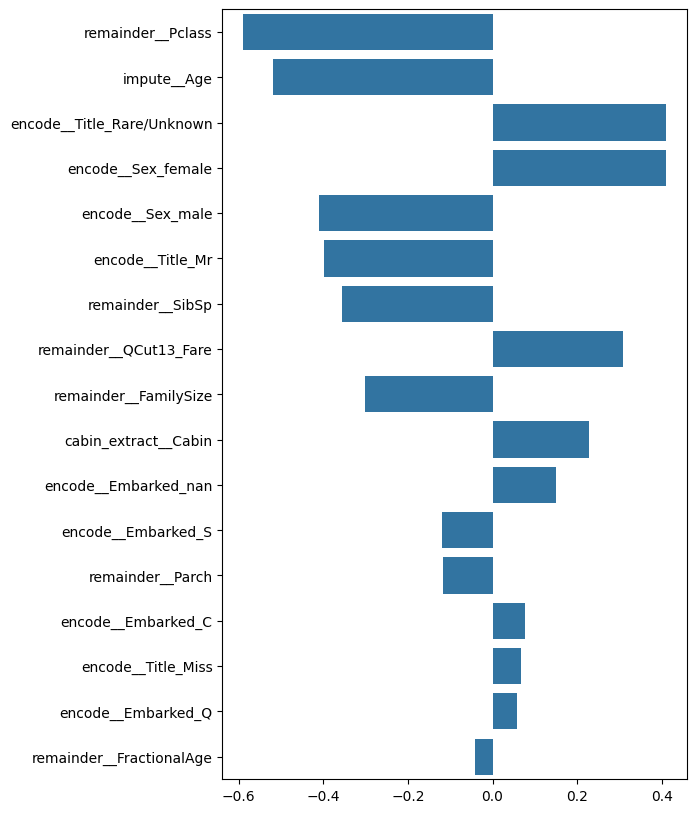

In [53]:
plt.figure(figsize=(6,10))
modelling_pipeline.fit(trainX, trainy)

x_plt = modelling_pipeline.steps[-1][1].coef_.ravel()
x_plt_abs = np.abs(x_plt)
y_plt = Pipeline(modelling_pipeline.steps[:-1]).fit_transform(trainX).columns
_,xp,yp=list(zip(*sorted(list(zip(x_plt_abs, x_plt, y_plt)),
                                  reverse=True)))

_=sns.barplot(x=list(xp),y=list(yp))

In [54]:
%%time
from sklearn.model_selection import GridSearchCV
gscv_roc = GridSearchCV(estimator = modelling_pipeline,
                        cv = skf,
                        scoring='roc_auc',
                        verbose=0,
                        param_grid = {'logreg__C': [0.001,1,1000],
                                      'fractional_Age': [None,AddFractionalAgeColumn()],
                                      'prep__impute__strategy': ['mean', 'median'],
                                      'discretize_Fare__n_bins': [5,13],
                                     },
                       )
_=gscv_roc.fit(X = train.drop(['Survived'], axis=1),
               y = train['Survived'],
              )

CPU times: user 5.62 s, sys: 3.6 s, total: 9.22 s
Wall time: 5.15 s


In [55]:
cv_res = pd.DataFrame({k:[[str(y)[:6] for y in x] for x in [gscv_roc.cv_results_['param_'+param_name].data for \
                                      param_name in gscv_roc.param_grid]][i] for \
                 i,k in enumerate(gscv_roc.param_grid)})
cv_res['mean_cross_validated_ROC_AUC'] = gscv_roc.cv_results_['mean_test_score']
cv_res['rank'] = gscv_roc.cv_results_['rank_test_score']
cv_res.to_csv('accuracy_cv.csv', index=False)
cv_res.sort_values(by = ['rank'])

,logreg__C,fractional_Age,prep__impute__strategy,discretize_Fare__n_bins,mean_cross_validated_ROC_AUC,rank
2,1,None,mean,5,0.866432,1
8,1,AddFra,mean,5,0.866416,2
10,1000,AddFra,mean,5,0.866192,3
4,1000,None,mean,5,0.866128,4
3,1,None,median,5,0.865920,5
5,1000,None,median,5,0.865809,6
9,1,AddFra,median,5,0.865809,6
11,1000,AddFra,median,5,0.865713,8
15,1,None,median,13,0.864882,9
14,1,None,mean,13,0.864794,10


In [56]:
for pname in gscv_roc.param_grid:
    print(f'--- {pname} ---')
    print(cv_res.groupby(pname)['mean_cross_validated_ROC_AUC'].mean())
    print('')

--- logreg__C ---
logreg__C
0.001    0.856208
1        0.865467
1000     0.865195
Name: mean_cross_validated_ROC_AUC, dtype: float64

--- fractional_Age ---
fractional_Age
AddFra    0.86227
None      0.86231
Name: mean_cross_validated_ROC_AUC, dtype: float64

--- prep__impute__strategy ---
prep__impute__strategy
mean      0.862349
median    0.862231
Name: mean_cross_validated_ROC_AUC, dtype: float64

--- discretize_Fare__n_bins ---
discretize_Fare__n_bins
13    0.861817
5     0.862764
Name: mean_cross_validated_ROC_AUC, dtype: float64

